# Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
import matplotlib.pyplot as plt
from matplotlib import rc
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
from keras.layers import LSTM
import random
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.utils.random import sample_without_replacement
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import datetime
import calendar 
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Read Data

In [8]:
df = pd.read_csv('tf_v1.csv')


In [9]:
len(df)

23107886

# Make Train and Test Sets

In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
ff = df[df.Fly_Cat==1]
of = df[df.Fly_Cat==0]

In [15]:
df

Fly_Cat  Hour        Lat        Lng              MacId  Month  \
0               0    16 -22.814356 -43.247151  da:a1:19:ed:c7:25      8   
1               1     8 -22.815443 -43.246200  48:49:c7:84:20:d8      8   
2               1    13 -22.814596 -43.247660  0e:80:62:25:be:91      8   
3               1    13 -22.814708 -43.247960  c4:98:80:9d:39:a7      8   
4               1    14 -22.815245 -43.245490  48:49:c7:63:bb:8c      8   
...           ...   ...        ...        ...                ...    ...   
23107881        0    10 -22.815571 -43.245583  da:a1:19:9e:41:4e     12   
23107882        0     4 -22.814955 -43.244541  4c:d1:a1:f8:3d:f1     12   
23107883        0    12 -22.814077 -43.247930  fc:64:3a:d1:91:a0     12   
23107884        0    15 -22.814718 -43.247441  78:f8:82:ff:28:0f     12   
23107885        0    23 -22.814734 -43.244362  c4:98:80:d1:d5:b9     12   

          Restaurant  Shopping  Waiting  Yrday  label  new_lat  dow  \
0                  0         0        1    213      3 -22.8144    3   
1                  1         0        0    213      1 -22.8154    3   
2                  0         0        1    213      3 -22.8146    3   
3                  0         0        1    213      3 -22.8147    3   
4                  0         1        0    213      2 -22.8152    3   
...              ...       ...      ...    ...    ...      ...  ...   
23107881           0         0        1    364      3 -22.8156    0   
23107882           0         1        0    364      2 -22.8150    0   
23107883           0         0        1    364      3 -22.8141    0   
23107884           0         1        0    364      2 -22.8147    0   
23107885           1         0        0    364      1 -22.8147    0   

          time_part2hr  time_part3hr  time_part4hr  time_part6hr  new_lng  
0                    9             6             5             3 -43.2472  
1                    5             3             3             2 -43.2462  
2                    7             5             4             3 -43.2477  
3                    7             5             4             3 -43.2480  
4                    8             5             4             3 -43.2455  
...                ...           ...           ...           ...      ...  
23107881             6             4             3             2 -43.2456  
23107882             3             2             2             1 -43.2445  
23107883             7             5             4             3 -43.2479  
23107884             8             6             4             3 -43.2474  
23107885            12             8             6             4 -43.2444  

[23107886 rows x 18 columns]

# % Behavior Overall

In [16]:
print("% Waiting ",(len(df[(df.Waiting==1)])/len(df)*100))

% Waiting  34.4121872507074


In [17]:
print("% Restaurant ",(len(df[(df.Restaurant==1)])/len(df)*100))

% Restaurant  20.454173090519834


In [18]:
print("% Shopping ",(len(df[(df.Shopping==1)])/len(df)*100))

% Shopping  45.133639658772765


# % Behavior Frequent Flyer

In [19]:
print("% Waiting ",(len(df[(df.Waiting==1) & (df.Fly_Cat==1)])/len(df[df.Fly_Cat==1]))*100)

% Waiting  25.275698688457048


In [20]:
print("% Restaurnt ",(len(df[(df.Restaurant==1) & (df.Fly_Cat==1)])/len(df[df.Fly_Cat==1]))*100)

% Restaurnt  24.11705463617844


In [21]:
print("% Shop ",(len(df[(df.Shopping==1) & (df.Fly_Cat==1)])/len(df[df.Fly_Cat==1]))*100)

% Shop  50.6072466753645


# % Behavior OneTime Flyer

In [22]:
print("% Waiting ",(len(df[(df.Waiting==1) & (df.Fly_Cat==0)])/len(df[df.Fly_Cat==0]))*100)

% Waiting  36.040367789020685


In [23]:
print("% Restaurnt ",(len(df[(df.Restaurant==1) & (df.Fly_Cat==0)])/len(df[df.Fly_Cat==0]))*100)

% Restaurnt  19.801424235622857


In [24]:
print("% Shop ",(len(df[(df.Shopping==1) & (df.Fly_Cat==0)])/len(df[df.Fly_Cat==0]))*100)

% Shop  44.15820797535646


In [25]:
df_gb = df.groupby(['Fly_Cat','dow','new_lat','new_lng','time_part2hr'],as_index=False).agg({'Restaurant':'sum','Shopping':'sum','Waiting':'sum'})
ff_gb = ff.groupby(['Fly_Cat','dow','new_lat','new_lng','time_part2hr'],as_index=False).agg({'Restaurant':'sum','Shopping':'sum','Waiting':'sum'})
of_gb = of.groupby(['Fly_Cat','dow','new_lat','new_lng','time_part2hr'],as_index=False).agg({'Restaurant':'sum','Shopping':'sum','Waiting':'sum'})


In [26]:
df_gb['activity'] = 0
ff_gb['activity'] = 0
of_gb['activity'] = 0
df_gb['count_pass'] = 0
ff_gb['count_pass'] = 0
of_gb['count_pass'] = 0

In [65]:
def activity(rest,shop,wait):
    if rest>=shop and rest>=wait:
        return 0
    elif shop>rest and shop>=wait:
        return 1
    return 2
    

of_gb['activity'] = df_gb.apply(lambda x: activity(x['Restaurant'],x['Shopping'],x['Waiting']), axis=1)


In [66]:
def count_pass(rest,shop,wait):
    if rest>=shop and rest>=wait:
        return rest
    elif shop>rest and shop>=wait:
        return shop
    return wait
    

of_gb['count_pass'] = df_gb.apply(lambda x: count_pass(x['Restaurant'],x['Shopping'],x['Waiting']), axis=1)


In [32]:
print("% Restaurant ",(len(df_gb[(df_gb.activity==0)])/len(df_gb)*100))

% Restaurant  19.336191531383978


In [33]:
print("% Shopping ",(len(df_gb[(df_gb.activity==1)])/len(df_gb)*100))

% Shopping  34.42041203012348


In [34]:
print("% Waiting ",(len(df_gb[(df_gb.activity==2)])/len(df_gb)*100))

% Waiting  46.24339643849254


In [52]:
ff_gb[['Fly_Cat','time_part2hr','new_lat','new_lng','dow']]

Fly_Cat  time_part2hr  new_lat  new_lng  dow
0            1             1 -22.8157 -43.2463    0
1            1             3 -22.8157 -43.2463    0
2            1             4 -22.8157 -43.2463    0
3            1             5 -22.8157 -43.2463    0
4            1             6 -22.8157 -43.2463    0
...        ...           ...      ...      ...  ...
28513        1            10 -22.8127 -43.2485    6
28514        1             5 -22.8127 -43.2484    6
28515        1             5 -22.8127 -43.2483    6
28516        1             6 -22.8126 -43.2484    6
28517        1             2 -22.8124 -43.2486    6

[28518 rows x 5 columns]

In [53]:
ff_gb[['activity']]

activity
0             0
1             0
2             0
3             0
4             0
...         ...
28513         0
28514         0
28515         0
28516         0
28517         0

[28518 rows x 1 columns]

In [105]:
#x = test[['Hour','lat1','lng1','dow','label']]
scaler = StandardScaler()

X = ff_gb[['Fly_Cat','time_part2hr','new_lat','new_lng','dow']]
Y = ff_gb[['activity']]

In [38]:
corr = df_gb.corr()

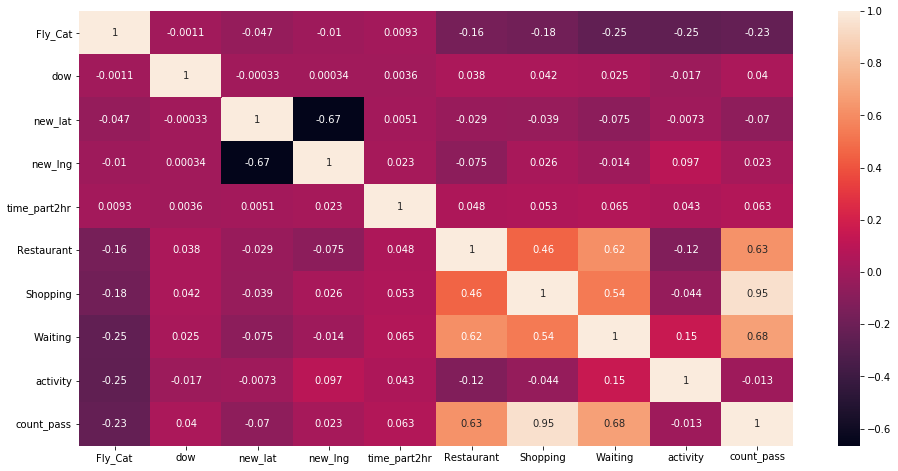

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)

In [831]:
# train_size = int(len(ff) * 0.8)
# test_size = int(len(ff) - train_size)
# train, test = ff.iloc[0:train_size],ff.iloc[train_size:len(ff)]
# print(len(train), len(test))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [82]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("DT Accuracy: ",accuracy_score(y_test, y_pred))

DT Accuracy:  0.7569043031470777


In [83]:
target_names = ['Restaurant', 'Shopping', 'Waiting']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Restaurant       0.69      0.69      0.69      2483
    Shopping       0.74      0.74      0.74      4240
     Waiting       0.80      0.80      0.80      5733

    accuracy                           0.76     12456
   macro avg       0.74      0.74      0.74     12456
weighted avg       0.76      0.76      0.76     12456



Confusion matrix, without normalization
[[1716  365  402]
 [ 383 3148  709]
 [ 405  764 4564]]


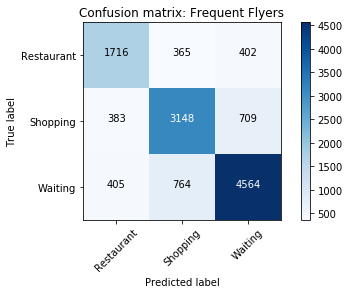

In [84]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix: Frequent Flyers')

plt.show()

# Random Forest

In [822]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("RF Accuracy: ",accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF Accuracy:  0.7789820166987798


In [823]:
target_names = ['Restaurant', 'Shopping', 'Waiting']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Restaurant       0.72      0.71      0.71      2483
    Shopping       0.76      0.77      0.76      4240
     Waiting       0.82      0.82      0.82      5733

    accuracy                           0.78     12456
   macro avg       0.77      0.76      0.76     12456
weighted avg       0.78      0.78      0.78     12456



In [824]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Confusion matrix, without normalization
[[1753  338  392]
 [ 350 3271  619]
 [ 348  706 4679]]


# XG Boost

In [111]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.39%


In [873]:
# X_test = X_test.reset_index()
X_test = X_test.drop(columns=['index','level_0'])

In [110]:
target_names = ['Restaurant', 'Shopping', 'Waiting']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Restaurant       0.75      0.41      0.53       863
    Shopping       0.75      0.54      0.63      1381
     Waiting       0.76      0.92      0.83      3460

    accuracy                           0.75      5704
   macro avg       0.75      0.62      0.66      5704
weighted avg       0.75      0.75      0.74      5704



Confusion matrix, without normalization
[[ 350   60  453]
 [  52  750  579]
 [  66  194 3200]]


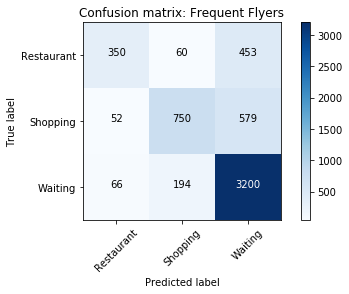

In [113]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix: Frequent Flyers')

plt.show()

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = ['Restaurant','Shopping','Waiting']

# Split the data into a training set and a test set

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix


# Tuning

In [717]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# train = pd.read_csv('train_modified.csv')
# target = 'Disbursed'
# IDcol = 'ID'

In [741]:
y_train.shape

(49821, 1)

In [745]:
import xgboost as xgb
import sklearn
import numpy as np
from sklearn.model_selection import GridSearchCV

def modelfit(alg, train_data_features, train_labels,useTrainCV=True, cv_folds=5):

    if useTrainCV:
        params=alg.get_xgb_params()
        xgb_param=dict([(key,[params[key]]) for key in params])

        boost = xgb.sklearn.XGBClassifier()
        cvresult = GridSearchCV(boost,xgb_param,cv=cv_folds)
        cvresult.fit(X,y)
        alg=cvresult.best_estimator_


    #Fit the algorithm on the data
    alg.fit(train_data_features, train_labels,eval_metric='merror')

    #Predict training set:
    dtrain_predictions = alg.predict(train_data_features)
    dtrain_predprob = alg.predict_proba(train_data_features)[:,1]

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % sklearn.metrics.accuracy_score(train_labels, dtrain_predictions))

xgb1 = xgb.sklearn.XGBClassifier(
 learning_rate =0.3,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=0,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective='multi:softmax',
 nthread=4,
 scale_pos_weight=0,
 seed=42)    

modelfit(xgb1, X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.8748


In [757]:
y = label_binarize(y_train, classes=[0, 1, 2])

In [766]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(0,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=500, max_depth=5,
 min_child_weight=0, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=0, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=5, min_child_weight=0,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=0,
            

In [775]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 0}

In [767]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [776]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=500, max_depth=5,
 min_child_weight=0, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=0,seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=5, min_child_weight=0,
                                     missing=nan, monotone_constraints=None,
                                     n_...read=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=0,
     

In [779]:
gsearch3.best_params_

{'gamma': 0.0}

In [781]:
gsearch3.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [787]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=500, max_depth=5,
 min_child_weight=0, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=0,seed=27), 
 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=5, min_child_weight=0,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=0,
                                     seed=27, subsample=0.8, tree_method=

In [788]:
gsearch4.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.9}

In [795]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=500, max_depth=5,
 min_child_weight=0, gamma=0, subsample=0.9, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=0,seed=27,reg_alpha=0.1), 
 param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=5, min_child_weight=0,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=0.1,
                                     reg_lambda=None, scale_pos_weight=0,
                                     seed=27, subsample=0.9, tree_method=N

In [796]:
gsearch6.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.9}

In [797]:
gsearch6.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.1,
              reg_lambda=1, scale_pos_weight=0, seed=27, subsample=0.9,
              tree_method=None, validate_parameters=False, verbosity=None)

In [798]:
gsearch6.best_score_

0.8106621252455367